In [1]:
import scipy
import pandas as pd
import numpy as np

In [2]:
def str_to_float(s: str) -> float:
    s = s.replace(',', '.')
    return float(s)

df = pd.read_csv('./example-data/synchronous machine.csv', delimiter=';')

df['Iy'] = df['Iy'].map(str_to_float)
df['PF'] = df['PF'].map(str_to_float)
df['e'] = df['e'].map(str_to_float)
df['dIf'] = df['dIf'].map(str_to_float)
df['If'] = df['If'].map(str_to_float)

df

,Iy,PF,e,dIf,If
0,3.0,0.66,0.34,0.383,1.563
1,3.0,0.68,0.32,0.372,1.552
2,3.0,0.70,0.30,0.360,1.540
3,3.0,0.72,0.28,0.338,1.518
4,3.0,0.74,0.26,0.317,1.497
...,...,...,...,...,...
552,6.0,0.91,0.09,0.142,1.322
553,6.0,0.93,0.07,0.151,1.331
554,6.0,0.95,0.05,0.160,1.340
555,6.0,0.97,0.03,0.160,1.340


In [3]:
def pearson(xs, ys):
    """pearson 相关系数"""
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)
    return np.dot(xs - x_mean, ys - y_mean) / np.sqrt(np.sum(np.power(xs - x_mean, 2))) / np.sqrt(np.sum(np.power(ys - y_mean, 2)))

In [4]:
for column in ['Iy', 'PF', 'e', 'dIf']:
    print(f"Pearson<{column}-If>: {pearson(df[column], df['If'])}")

Pearson<Iy-If>: 0.4249449073594647
Pearson<PF-If>: -0.8610134695270651
Pearson<e-If>: 0.861013469527065
Pearson<dIf-If>: 0.9999999999999998


In [5]:
# 箱形图的绘制
import matplotlib.pyplot as plt

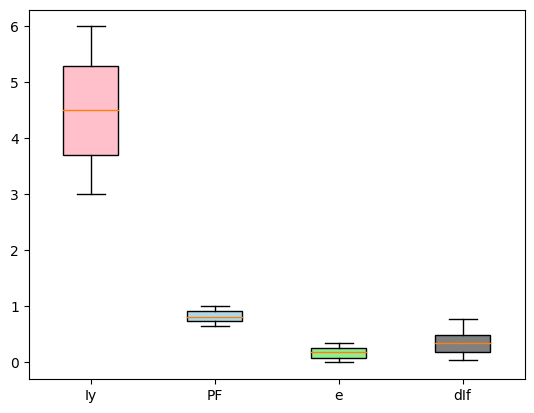

In [19]:
ax = plt.subplot()
bplot = ax.boxplot(df[['Iy', 'PF', 'e', 'dIf']], patch_artist=True, labels=df.columns[:4])
for patch, color in zip(bplot['boxes'], ['pink', 'lightblue', 'lightgreen', 'gray']):
    patch.set_facecolor(color)